#### Τσιμπλιαρίδης Νικόλαος 9652
#### Τζελίλαϊ Τζούλιο 9662

# Εργασία 3

## Μέρος Α'
### Ερώτημα 1


In [1]:
import sklearn
import numpy as np
from scipy import stats

Αρχικά θα απεικονίσουμε τα δεδομένα μας με ένα scatter plot, για πάρουμε μία εικόνα του πώς θα πρέπει να να διαχωρίσουμε τις περιοχές στο δέντρο μας:

(1.5, 4.9)

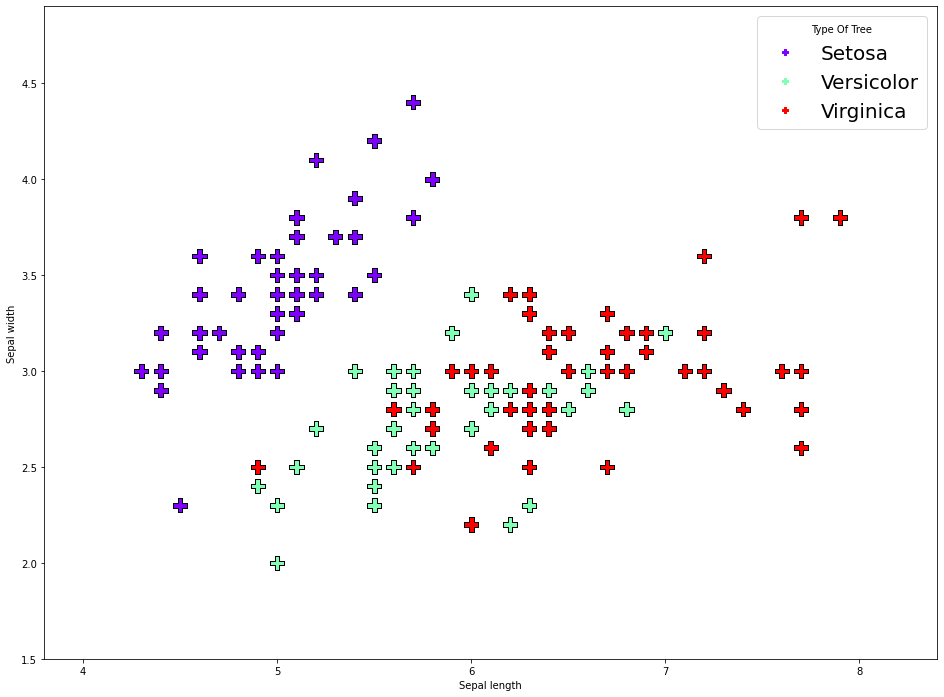

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Εισάγουμε τα δεδομένα του iris dataset και αποθηκέυουμε τις δύο πρώτες στήλες που αντιπροσωπεύουν 
# το μήκος και το πλάτος των σεπάλων στο SepalDimensions
iris = datasets.load_iris()
SepalDimensions = iris.data[:, :2] 

# το target περιέχει την κλάση του δείγματος για κάθε ζεύγος μήκους-πλάτους
# 0 για 'setosa', 1 για 'versicolor' και 2 για 'virginica'
Classes = iris.target

# H τιμή x_min παίρνει την ελάχιστη τιμή των Χ μειωμένη κατά 0.5
# Ενώ η x_max παίρνει την μέγιστη τιμη των Χ αυξημένη κατά 0.5
# Ομοίως και για y_min και y_max
# Οι τιμές αυτές μας χρειάζονται για τα όρια του scatter plot
x_min, x_max = SepalDimensions[:, 0].min() - 0.5, SepalDimensions[:, 0].max() + 0.5
y_min, y_max = SepalDimensions[:, 1].min() - 0.5, SepalDimensions[:, 1].max() + 0.5

# Φτιάχνουμε ένα figure
plt.figure(2, figsize=(16, 12))
plt.clf()

# Πλοτάρουμε τα σημεία, ο άξονας των χ είναι το μήκος και ο άξονας των y το πλάτος
for plants in [0, 1, 2]:
    sc = plt.scatter(SepalDimensions[:, 0], SepalDimensions[:, 1], c=Classes, cmap='rainbow', label = plants , edgecolor="k", marker = "P", s=200)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend(handles=sc.legend_elements()[0], title="Type Of Tree", labels=['Setosa', 'Versicolor', 'Virginica'], prop={'size': 20})
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


Παρατηρούμε ότι η μοβ κλάση είναι πολύ πιο εύκολο να διαχωριστεί ενώ στις άλλες δυο θα υπάρχει αναπόφευκτα κάποιο σφάλμα

Τώρα θα υλοποιήσουμε τον Desicion Tree Classifier. Χρησιμοποιούμε την train_test_split για να χωρίσουμε τυχαία τα δειγματά μας, παίρνοντας το 50% αυτών. Χρησιμοποιούμε ένα συγκεκριμένο random state για να παίρνουμε συνέχεια το ίδιο τυχαίο δείγμα ώστε να τεστάρουμε πιο εύκολα την απόδοση της υλοποίησής μας.


In [3]:
# Κάνουμε import τις απαραίτητες βιβλιοθήκες
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Χωρίζουμε και αποθηκεύουμε τα δεδομένα μας σε train και test sets 
X_train, X_test, y_train, y_test = train_test_split(SepalDimensions, Classes, test_size=0.5, random_state=142) # 50% training and 50% test

# Δημιουργούμε τον classifer 
clf = DecisionTreeClassifier(random_state=3, max_depth = 4)

# Εκπαιδεύουμε τον classifier μόνο με το training set
clf = clf.fit(X_train,y_train)

# Προβλέπουμε το classification στο test set και το αποθηκεύουμε στο y_pred
y_pred = clf.predict(X_test)

# To metrics.accuracy_score συγκρίνει το y_pred με τα σωστά classification και βγάζει το accuracy 
# το οποίο εκτυπώνουμε με ακρίβεια 2 δεκαδικών ψηφείων
print("Accuracy on test set: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))

Accuracy on test set: 72.00%


### Ερώτημα 2
Απεικόνιση των ορίων απόφασης για το δέντρο ταξινόμησης, τα χρώματα στο background υποδηλώνουν τι θα μάντευε το δέντρο μας, ενώ το χρώμα των κουκίδων την πραγματική κλάση για τα δεδομένα.

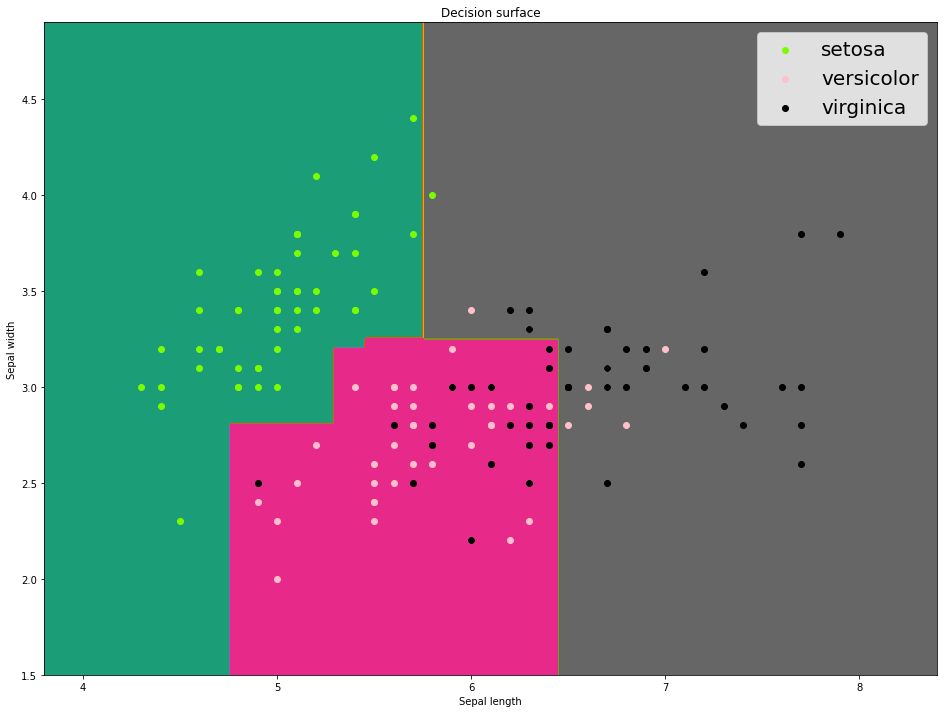

In [4]:
# Θέτουμε τα διαφορετικά χρώματα για κάθε κλάση και το βήμα του πλοτ
plot_colors = ['lawngreen', 'pink', 'k']
plot_step = 0.01

# Φτιάχνουμε ένα figure
plt.figure(figsize = (16,12))

# Φτίαχνουμε ένα grid με βήμα 0.01 (x_min εώς x_max στον άξονα των x, και y_min εώς y_max στον άξονα των y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
# Αποθηκεύουμε στο Ζ τις προβλεπόμενες κλάσεις για όλες τις τιμές στο grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Μετατρέπουμε το Ζ από μία στήλη με όλους τους συνδυασμούς x-y σε έναν δισδιάστατο πίνακα 
# οπού η τιμή του Ζ στο x0,y0 είναι η πρόβλεψη που θα έκανε ο classifier για x0,y0
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Dark2)

# Προσθέτουμε τα x-y Labels
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Απεικονίζουμε στο ίδιο γράφημα και όλα τα δεδομένα μας για να ελέγξουμε αν φαίνεται σωστή η ταξινόμηση
for i, color in zip(range(3), plot_colors):
    idx = np.where(Classes == i)
    plt.scatter(SepalDimensions[idx, 0], SepalDimensions[idx, 1], c=color, label=iris.target_names[i])
    

plt.title("Decision surface")
plt.legend(prop={'size': 20})
plt.show()


Παρατηρούμε ότι για τις πράσινες κουκίδες, μόνο μία έχει ταξινομηθεί λάθος, όπως περιμέναμε, ενώ το μεγαλύτερο σφάλμα είναι ανάμεσα στις ρόζ και στις μαύρες.

Αυτές που ταξινομούμε σαν μαύρες δεν έχουν και πολύ μεγάλο σφάλμα, σε αντίθεση με αυτές που ταξινομούμε σαν ροζ οι οποίες έχουν πολύ μεγάλη πιθανότητα να είναι στην πραγματικότητα μαύρες.

## Μέρος Β'

### Ερώτημα 1

Για να υλοποιήσουμε το Random Forest θα χρειαστούμε μία συνάρτηση Bootstrap.

Η συνάρτηση αυτή δέχεται σαν όρισμα το training set (X και y) και ένα όρισμα gamma το οποίο δείχνει το ποσοστό του δείγματος που θα χρησιμοποιηθεί για το νέο δείγμα.

Επιστρέφει τυχαία επιλεγμένα ζευγάρια τιμών από το Χ καθώς και την ταξινόμηση τους (y)

Π.χ. :  
Αν η είσοδος μας ήταν:  

Χ = [[1, 1], [1,3], [2,3], [3,1], [5,6], [5,2]]

y = [0, 1, 1, 0, 2, 1]

Μία πιθανή έξοδος θα ήταν:

sample = [[1, 3], [3,1], [3,1]]

samplelabel = [1, 0, 0]

Όπως βλέπουμε είναι πιθανό μία από τις τιμές να επιλεγχεί πάνω από μία φορές. 

In [5]:
import random

def bootstrapSample(data, labels, gamma = 0.5):
    # Φτιάχνουμε μια λίστα που περιέχει τα indexes από 0 εώς το μήκος του data (Για την συγκεκριμένη περίπτωση 75)
    indexes = list(range(0, len(data)))
    
    # Πόσα indexes θα επιλεγχούν (75*0.5 = 37.5, αλλά κρατάμε μ΄όνο το ακέραιο μέρος, άρα 37)
    numOfSelected = int(len(data)*gamma)
    
    # Δημιουργούμε τον πίνακα στον οποίο θα αποθηκεύσουμε τα επιλεγμένα indexes και το αρχικοποιούμε με 0
    selectedIndexes = np.zeros((numOfSelected,1))
    
    # Επιλέγουμε τυχάια (37) indexes
    for j in range(numOfSelected):
        selectedIndexes[j] = random.choice(indexes)
       
    # Μετατρέπουμε τον πίνακα σε int επειδή random choice τον έχει κάνει float
    selectedIndexes = selectedIndexes.astype(int)
    
    # Αρχικοποιούμε τον Sample και Samplelabel με 0
    sample = np.zeros((numOfSelected,2))
    samplelabel = np.zeros((numOfSelected,1))
    
    # Αποθηκεύουμε τα επιλεγμένα δεδομένα στους αντίστοιχους πίνακες και επιστρέφονται από την συνάρτηση
    for i in range(numOfSelected):
        sample[i][0] = data[selectedIndexes[i], 0]
        sample[i][1] = data[selectedIndexes[i], 1]
        samplelabel[i] = labels[selectedIndexes[i]]
    return sample, samplelabel



Δημιουργούμε την συνάρτηση randomForest

H συνάρτηση αυτή δέχεται σαν όρισμα τα training και testing δεδομένα και το classification τους, τον αριθμό των δειγμάτων bootstrap αλλά και το ποσοστό των δεδομένων που θα χρησιμοποιήθούν σε κάθε δείγμα bootstrap

Επιστρέφει τον εκπαιδευμένο με βάση όλα τα δείγματα classifier

In [6]:
def randomForest(trainData, trainLabels, testData, testLabels, numOfSamples = 100, g = 0.5):
    # Πόσα ζευγάρια δεδομένων έχει το τεστ σετ
    numOfTests = len(testLabels)
    # Δημιουργούμε τον classifier μας με κάποιο μέγιστο βάθος
    clf1 = DecisionTreeClassifier(random_state=3, max_depth = 3)
    
    # Φτιάχνουμε τα 100 subsets καλώντας την συνάρτηση bootstrap 100 φορές και αποθηκεύοντας τα στους πίνακες Xsub και ysub
    Xsub = dict()
    ysub = dict()
    for i in range(numOfSamples):
        Xsub[i], ysub[i] = bootstrapSample(trainData, trainLabels, gamma = g)
        
    # H πρώτη λούπα, αφορά τις τελικές προβλέψεις που θα κάνουμε και θα αποθηκεύσουμε στο y_pred
    y_pred = []
    for instance in range(0, numOfTests):
        # H δεύτερη λούπα αφορά τις προβλέψεις του κάθε δέντρου για το ίδιο ζεύγος τιμών Χ
        # Στο predictions αποθηκεύονται οι προβλέψεις για ένα σημείο απο κάθε δέντρο
        predictions = []
        for subset in range(0, numOfSamples):
            # Κάνουμε train με βάση το εκάστωτε subset
            clf1.fit(Xsub[subset], ysub[subset])
            # Προβλέπουμε για το στοιχείο με index = instance του σετ και προσθέτουμε το αποτέλεσμα στην λίστα predictions
            predictions.append(clf1.predict(X_test[instance].reshape(-1, 2)))

        # Από το prediction επιλέγουμε με το mode το πιο συχνό στοιχείο του και το προσθέτουμε στην λίστα των αποτελεσμάτων
        y_pred.append(stats.mode(np.array(predictions), axis=None)[0][0])
    # Εκτυπώνουμε το accuracy με βάση την σύγκριση με το y_test
    print("Accuracy on test set: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred) * 100))
        
    return clf1
        
        
# Καλούμε την randomForest() και αποθηκεύουμε τον εκπαιδευμένο classifier στο forestclf για να τον πλοτάρουμε στην συνέχεια     
forestclf = randomForest(X_train, y_train, X_test, y_test)

Accuracy on test set: 80.00%


Τρέχοντας τον κώδικα αρκετές φορές για διαφορετικά μέγιστα βάθη παρατηρούμε ότι το καλύτερο αποτέλεσμα βγαίνει για μέγιστο βάθος = 3. Το accuracy που βγάζουμε είναι από 74.67% εώς 80% και έχει να κάνει με την τυχαιότητα των δειγμάτων bootstrap αφού σε όλα τα υπόλοιπα σημεία του χρησιμοποιούμε συγκεκριμένα random_states.

Σε κάθε περίπτωση πρόκειται για μία βελτίωση 2.67%-8% η οποία είναι σημαντική και αναμενόμενη αλλά χωρίς να προσδίδει τεράστια ακρίβεια στον ταξινομητή μας

### Ερώτημα 2

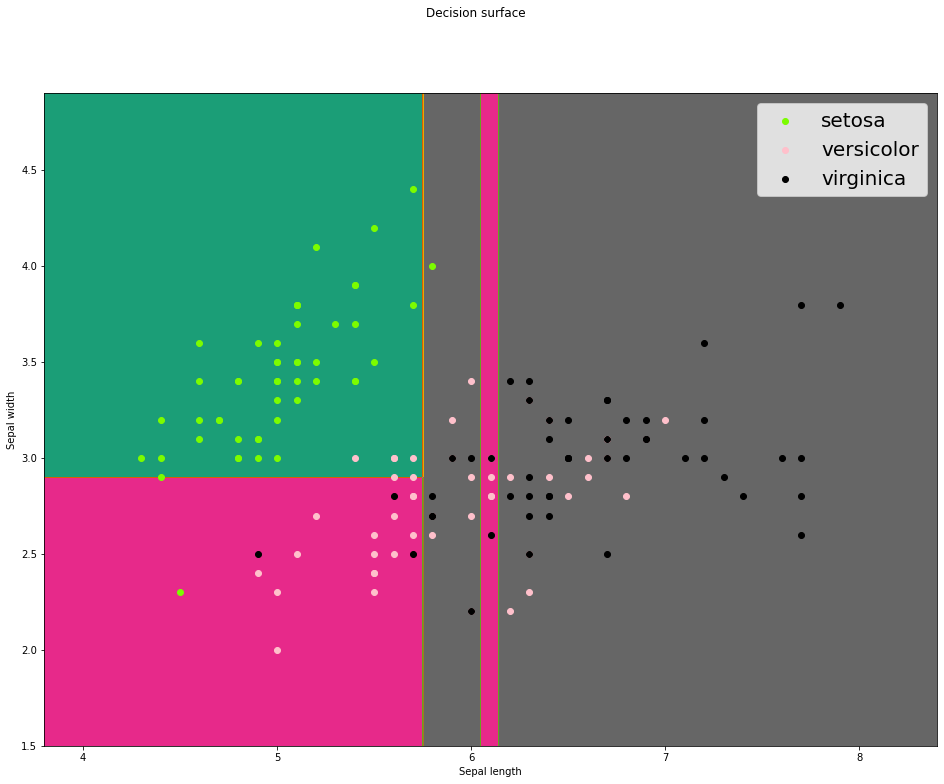

In [7]:
# Φτιάχνουμε ένα figure
plt.figure(figsize = (16,12))

# Φτίαχνουμε ένα grid με βήμα 0.01 (x_min εώς x_max στον άξονα των x, και y_min εώς y_max στον άξονα των y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# Αποθηκεύουμε στο Ζ τις προβλεπόμενες κλάσεις για όλες τις τιμές στο grid
Z = forestclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Μετατρέπουμε το Ζ από μία στήλη με όλους τους συνδυασμούς x-y σε έναν δισδιάστατο πίνακα 
# οπού η τιμή του Ζ στο x0,y0 είναι η πρόβλεψη που θα έκανε ο classifier για x0,y0
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Dark2)

# Προσθέτουμε τα x-y Labels
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Απεικονίζουμε στο ίδιο γράφημα και όλα τα δεδομένα μας για να ελέγξουμε αν φαίνεται σωστή η ταξινόμηση
for i, color in zip(range(3), plot_colors):
    idx = np.where(Classes == i)
    plt.scatter(SepalDimensions[idx, 0], SepalDimensions[idx, 1], c=color, label=iris.target_names[i])

plt.suptitle("Decision surface")
plt.legend(prop={'size': 20})
plt.show()

Η βελτίωση είναι και αισθητή κυρίως στο κομμάτι των λάθος ροζ ταξινομήσεων, πλέον δηλαδή όταν ταξινομούμε κάτι σαν ροζ είναι πολύ πιο πιθανό να είναι όντως ροζ. Αυτό βέβαια φαίνεται να έχει οδηγήσει σε μία μικρή μείωση την σωστής πρόβλεψης για μαύρα, η οποία όμως δεν μας ενοχλεί αφού το συνολικό αποτέλεσμα είναι καλύτερο. 

### Ερώτημα 3

In [8]:
import time

# Ορίζουμε το αρχικό γάμα 
g1 = 0.1

# Σε κάθε επανάληψη καλούμε το randomForest ταξινομητή μας με το εκάστωτε γαμα και μετράμε το accuracy 
# καθώς και τον χρόνο που πήρε για να εκτελεστεί
# στο τέλος της λούπας προσθέτουμε 0.15 στο γάμα που είναι το βήμα μας
for j in range(10):
    print("Gamma = {:.2f}".format(g1))
    start = time.time()
    forestclf = randomForest(X_train, y_train, X_test, y_test, g = g1)
    end = time.time()
    print("Time Elapsed: ",(end - start), "secs\n")
    g1 = g1 + 0.1


Gamma = 0.10
Accuracy on test set: 72.00%
Time Elapsed:  3.4470605850219727 secs

Gamma = 0.20
Accuracy on test set: 74.67%
Time Elapsed:  3.865435838699341 secs

Gamma = 0.30
Accuracy on test set: 74.67%
Time Elapsed:  4.478147029876709 secs

Gamma = 0.40
Accuracy on test set: 76.00%
Time Elapsed:  4.32177209854126 secs

Gamma = 0.50
Accuracy on test set: 78.67%
Time Elapsed:  4.3582940101623535 secs

Gamma = 0.60
Accuracy on test set: 80.00%
Time Elapsed:  5.17591667175293 secs

Gamma = 0.70
Accuracy on test set: 78.67%
Time Elapsed:  5.077381372451782 secs

Gamma = 0.80
Accuracy on test set: 78.67%
Time Elapsed:  4.943220376968384 secs

Gamma = 0.90
Accuracy on test set: 77.33%
Time Elapsed:  5.437781095504761 secs

Gamma = 1.00
Accuracy on test set: 77.33%
Time Elapsed:  5.131134033203125 secs



Όπως βλέπουμε γενικά ο χρόνος για μεγαλύτερο γάμμα δεν αλλάζει, οπότε θα διαλέξουμε γάμμα με μοναδικό γνώμονα το accuracy του αλγορίθμου. Όσον αφορά το accuracy παρατηρούμε ότι για τιμές 0.3 και μικρότερες,  η τιμή του είναι μειωμένη ενώ από 0.4 και πάνω είναι πάνω κάτω η ίδια. Γενικά με το πλήθος δειγμάτων που έχουμε φαίνεται ότι για μεγαλύτερο γάμα αυξάνεται και η απόδοση μέχρι αυτό να φτάσει τα 30 περίπου στοιχεία σε κάθε δείγμα Bootstrap. Από εκεί και πάνω (δηλαδή 30-75 στοιχεία ανά δείγμα bootstrap το accuracy παραμένει σχεδόν σταθερό.